In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Part 1: Prepare the Data

In [2]:
df = pd.read_csv("myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df2 = df.drop("MYOPIC", axis=1)

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

## Part 2: Apply Dimensionality Reduction

In [5]:
pca = PCA(n_components=0.95)
pca_transformed_data = pca.fit_transform(scaled_data)

In [6]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [7]:
df2["x"] = transformed_features[:,0]
df2["y"] = transformed_features[:,1]
df2["class"] = df["MYOPIC"]

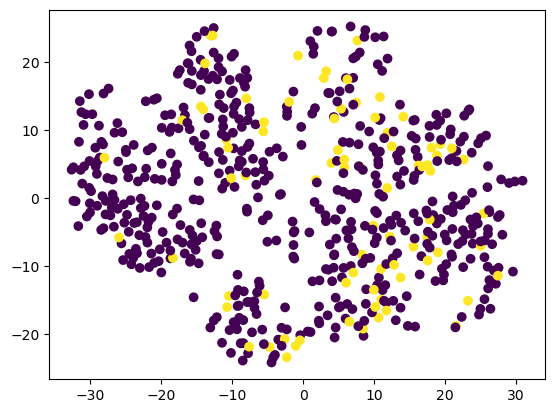

In [8]:
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

In [9]:
df3 = df.drop("MYOPIC", axis=1)
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df3)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


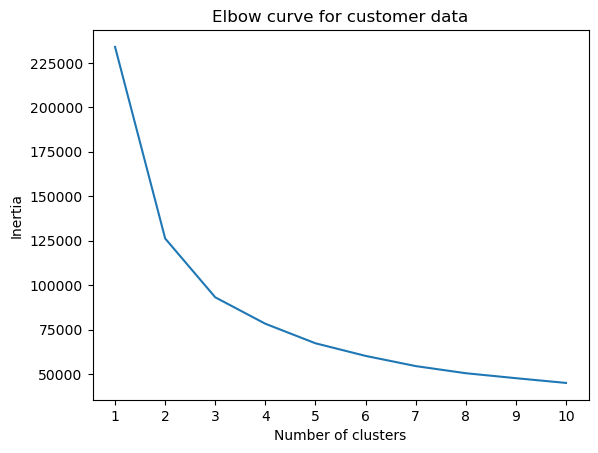

In [10]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [11]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [12]:
clusters = get_clusters(2, df3)

In [13]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [14]:
def show_clusters(df,co11,col2):
    plt.scatter(df[co11], df[col2], c=df['class'])
    plt.xlabel(co11)
    plt.ylabel(col2)
    plt.show()

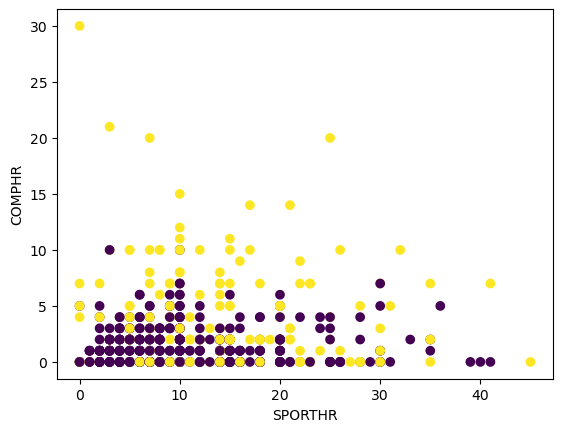

In [15]:
show_clusters(clusters,'SPORTHR','COMPHR')

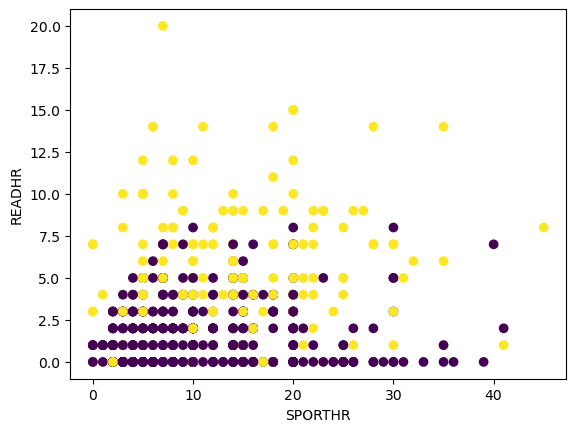

In [16]:
show_clusters(clusters,'SPORTHR','READHR')

## Part 4: Make a Recommendation

After trying three clusters, I finally settled on two clusters.  My reason for settling for two clusters is because the final label was either yes or no for myopic.  I then wanted to test different scenarios between sports and reading hours and sports and computer hours to see if there was a difference.  The visuals appear to be similar.  There is definitely a clustering for the purple data points, but the yellow appear to be more spread out.  For the t-SNE there does not seem to be any clustering. All the data points were meshed together.